#Information Theory Basics
**a.** The traditional equation for conditional entropy is:
𝐻(X|Y) = ∑_{y∈Y}∑_{x∈X}p(x,y)log(1/p(X|Y)).

Similarly, 𝐻(Y|X) = ∑_{x∈X}∑_{y∈Y}p(y,x)log(1/p(Y|X)).

The conditions Y knowing X and X knowing Y are different so the intuition is that these are not equal. Please see before the practical application using the values given.




In [29]:
import numpy as np

P = np.zeros([4]*2)
P[0][0] = 1/8
P[0][1] = 1/16
P[0][2] = 1/32
P[0][3] = 1/32
P[1][0] = 1/16
P[1][1] = 1/8
P[1][2] = 1/32
P[1][3] = 1/32
P[2][0] = 1/16
P[2][1] = 1/16
P[2][2] = 1/16
P[2][3] = 1/16
P[3][0] = 1/4

H_conditional_Y_X = 0
H_conditional_X_Y = 0

PY = np.sum(P, axis=0)
PX = np.sum(P, axis=1)

for Y in range(4):
  if PY[Y] != 0:
    for X in range(4):
      if P[X][Y] != 0:
        H_conditional_X_Y += P[X][Y]*np.log2(1/(P[X][Y]/PY[Y]))

for X in range(4):
  if PX[X] != 0:
    for Y in range(4):
      if P[X][Y] != 0:
        H_conditional_Y_X += P[X][Y]*np.log2(1/(P[X][Y]/PX[X]))

print(H_conditional_X_Y)
print(H_conditional_Y_X)

1.625
1.375


This shows that the entropies are not equivalent.

**b.** The formula for entropy is given by:

𝑯(X) = ∑_{x∈X}p(x)log(1/p(x))

This means that H(X) - H(X|Y) = ∑_{x∈X}p(x)log(1/p(x)) - ∑_{y∈Y}∑_{x∈X}p(x,y)log(1/p(X|Y)) and

𝐻(Y) - H(Y|X) = ∑_{y∈Y}p(y)log(1/p(y)) - ∑_{y∈Y}∑_{x∈X}p(x,y)log(1/p(Y|X))



In [30]:
H_X = 0
H_Y = 0

for X in range(4):
  H_X += PX[X]*np.log2(1/PX[X])

for Y in range(4):
  H_Y += PY[Y]*np.log2(1/PY[Y])


print(H_X - H_conditional_X_Y)
print(H_Y - H_conditional_Y_X)

0.375
0.375


So we can see that these values are in fact equal.

**c.** The formula for I(X, Y) is ∑_{x∈X}∑_{y∈Y}p(x,y)log(p(x,y)/(p(x)p(y)))

In [31]:
I_X_Y = 0

for X in range(4):
  for Y in range(4):
    if P[X][Y] != 0:
      I_X_Y += P[X][Y]*np.log2(P[X][Y]/(PX[X]*PY[Y]))

print(I_X_Y)


0.375


# Maximum Likelihood Parameter Estimation
Task 1:

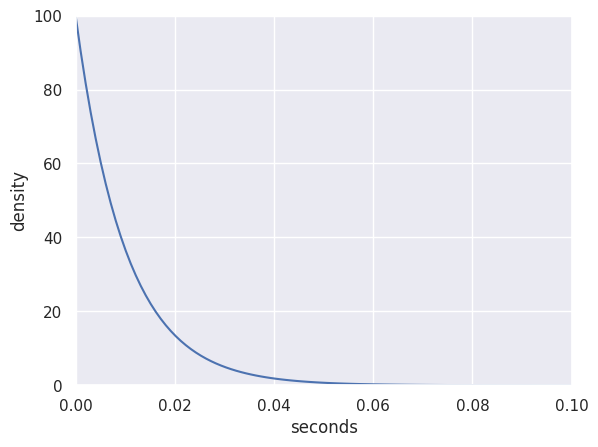

In [32]:
import matplotlib.pyplot as plt

lamb = 100
x = np.linspace(0, 0.1, 100)
y = np.zeros([x.shape[0], 1])

for i in range(x.shape[0]):
  y[i] = lamb*np.exp(-lamb*x[i])

plt.xlim(0, 0.1)
plt.ylim(0, 100)
plt.plot(x, y)
plt.xlabel('seconds')
plt.ylabel('density')
plt.show()

Task 2:

**a)**

In [33]:
#Let lamb2 be the new parameter we are trying to find
#total_likelihood = lamb2**x.shape[0]*np.exp(-lamb2(np.sum(x)))
#log_likelihood = np.log(total_likelihood)
#NLL = -log_likelihood
#gradient_NLL = -x.shape[0]/lamb2 + np.sum(x)

lamb2 = 100 #begin by setting large lambda to minimize
eta = 0.1 #set a small term for the learning rate
lamb2_list = [] #to store iterated values of lamb2 for plotting later

for epoch in range(100):
  for i in range(x.shape[0]):
    gradient_NLL = -x.shape[0]/lamb2 + np.sum(x)
    lamb2 -= eta*gradient_NLL
    lamb2_list.append(lamb2)

print("The estimated parameter is:")
print(lamb2)

The estimated parameter is:
20.00000000000007


**b)**

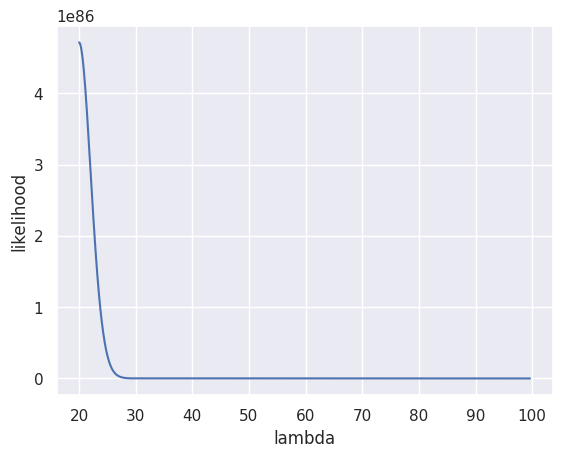

In [34]:
total_likelihood = np.zeros(len(lamb2_list))
lamb2_values = np.array(lamb2_list)

for i in range(lamb2_values.shape[0]):
  total_likelihood[i] = lamb2_values[i]**x.shape[0]*np.exp(-lamb2_values[i]*np.sum(x))

plt.plot(lamb2_values, total_likelihood)
plt.xlabel('lambda')
plt.ylabel('likelihood')
plt.show()

# Linear Regression and SGD

  Cloning https://github.com/pantelis-classes/PRML.git to /tmp/pip-install-xbpdx14l/prml_b8a7bda123e74d7c907145da4d0a8637
  Running command git clone --filter=blob:none --quiet https://github.com/pantelis-classes/PRML.git /tmp/pip-install-xbpdx14l/prml_b8a7bda123e74d7c907145da4d0a8637
  Resolved https://github.com/pantelis-classes/PRML.git to commit 6c7ef85da419a644a4a4feb7ab538d2f4f15d46b
  Preparing metadata (setup.py) ... done
The hyperparameters I used are: eta = 0.1, lambda = 0.1, epochs = 100, and m = 10
[ 0.68027872  0.02392397  0.0558755  -0.49940048  2.18884587 -5.03933176
  5.50266594 -0.38998262 -5.36147619  5.02845191 -1.4824659 ]


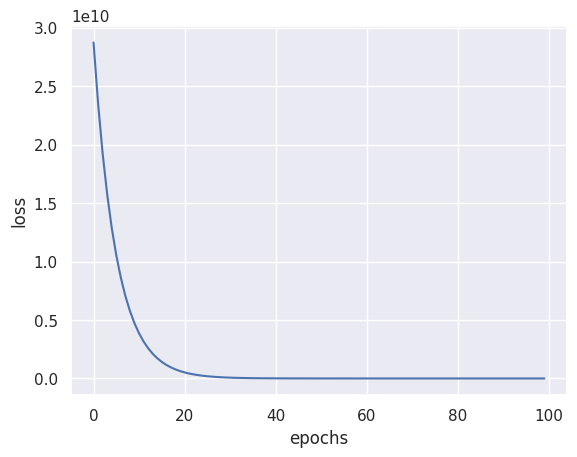

In [35]:
!pip install git+https://github.com/pantelis-classes/PRML.git#egg=prml

import seaborn as sns

# Apply the default theme
sns.set_theme()

from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

from prml.preprocess import GaussianFeature, PolynomialFeature, SigmoidalFeature
from prml.linear import (
    BayesianRegression,
    EmpiricalBayesRegression,
    LinearRegression,
    RidgeRegression
)

np.random.seed(1234)

def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    y = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, y

def sinusoidal(x):
    return np.sin(2 * np.pi * x)

x_train, y_train = create_toy_data(sinusoidal, 10, 0.25)
x_test = np.linspace(0, 1, 100)
y_test = sinusoidal(x_test)

#Hyperparameters
eta = 0.1
lambda_reg = 0.1
epochs = 100
m = 10

losses = []

w = PolynomialFeature(m)

X_train = w.transform(x_train)
X_test = w.transform(x_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_hat, y_std = model.predict(X_test, return_std=True)

for epoch in range(epochs):
  total_loss = 0
  for i in range(m):
    loss = (np.sum(y_hat[i] - y_test[i])**2)/(2*m) + lambda_reg*np.sum(model.w**2)/2
    total_loss  += loss
    gradient = np.sum(y_hat[i] - y_test[i])/m*X_test[i] + lambda_reg*model.w
    model.w -= eta*gradient
  losses.append(total_loss)

print("The hyperparameters I used are: eta = 0.1, lambda = 0.1, epochs = 100, and m = 10")
print(model.w)

plt.plot(range(epochs), losses, label='Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()